In [20]:
import pandas as pd

In [21]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import Row
appName= "hive_pyspark"
master= "local"
from pyspark.sql.functions import col, asc,desc, avg
from tqdm import tqdm
from pyspark.sql import functions as F
from pyspark.sql.types import StructType
import pandas as pd

In [22]:
spark = SparkSession.builder.master(master).appName(appName).enableHiveSupport().getOrCreate()

In [23]:
spark.sql("USE mmop_tesla_project")

DataFrame[]

In [24]:
df_stock = spark.sql("select * from stock")
df_stock_limit = spark.sql("select * from stock LIMIT 100")

In [26]:
df_stock_limit.show()

+----+--------+-------------------+-----+-------+--------------+
|   s|       p|                  t|    v|      c|ingestion_date|
+----+--------+-------------------+-----+-------+--------------+
|TSLA|157.1914|14-12-2022 19:24:13|  4.0|   1;12|    2022-12-14|
|TSLA|157.1914|14-12-2022 19:24:13|  4.0|     12|    2022-12-14|
|TSLA|157.1801|14-12-2022 19:24:13|  3.0|   1;12|    2022-12-14|
|TSLA|157.1801|14-12-2022 19:24:13|  3.0|     12|    2022-12-14|
|TSLA|  157.19|14-12-2022 19:24:13|  2.0| 1;8;12|    2022-12-14|
|TSLA|  157.19|14-12-2022 19:24:13| 32.0| 1;8;12|    2022-12-14|
|TSLA|  157.19|14-12-2022 19:24:13|  2.0|8;12;41|    2022-12-14|
|TSLA|157.1702|14-12-2022 19:24:13|700.0|      1|    2022-12-14|
|TSLA|  157.19|14-12-2022 19:24:13| 32.0|8;12;41|    2022-12-14|
|TSLA|157.1702|14-12-2022 19:24:13|700.0|   null|    2022-12-14|
|TSLA|  157.19|14-12-2022 19:24:13|  8.0|   1;12|    2022-12-14|
|TSLA|  157.19|14-12-2022 19:24:13|  8.0|     12|    2022-12-14|
|TSLA|157.1824|14-12-2022

In [11]:
df = df_stock.groupby("t").agg(avg("p").alias("p")).orderBy(col("t").asc()) #.dropDuplicates(["t"])
df_pd = df.toPandas()

In [47]:
df_pd

,t,p,datetime
0,14-12-2022 11:02:43,159.255718,2022-12-14 11:02:43
1,14-12-2022 11:02:44,159.276667,2022-12-14 11:02:44
2,14-12-2022 11:02:45,159.250000,2022-12-14 11:02:45
3,14-12-2022 11:02:54,159.300003,2022-12-14 11:02:54
4,14-12-2022 11:02:57,159.300003,2022-12-14 11:02:57
...,...,...,...
94719,17-12-2022 00:59:54,149.032497,2022-12-17 00:59:54
94720,17-12-2022 00:59:55,149.063809,2022-12-17 00:59:55
94721,17-12-2022 00:59:56,149.082504,2022-12-17 00:59:56
94722,17-12-2022 00:59:57,149.090007,2022-12-17 00:59:57


In [63]:
df_pd['datetime'] = pd.to_datetime(df_pd['t'])
grouped = df_pd.groupby(pd.Grouper(key='datetime', axis=0, freq='D')).count()

In [64]:
grouped

,t,p
datetime,,
2022-12-14,18584,18584
2022-12-15,35087,35087
2022-12-16,38597,38597
2022-12-17,2456,2456


In [54]:
grouped = df_pd[df_pd['datetime'].dt.day == 16].groupby(pd.Grouper(key='datetime', axis=0, freq='T')).mean()

In [55]:
grouped

,p
datetime,
2022-12-16 11:21:00,156.273509
2022-12-16 11:22:00,156.250042
2022-12-16 11:23:00,156.240668
2022-12-16 11:24:00,156.221377
2022-12-16 11:25:00,156.203272
...,...
2022-12-16 23:55:00,149.037763
2022-12-16 23:56:00,149.035255
2022-12-16 23:57:00,149.027196


Text(0, 0.5, 'Value')

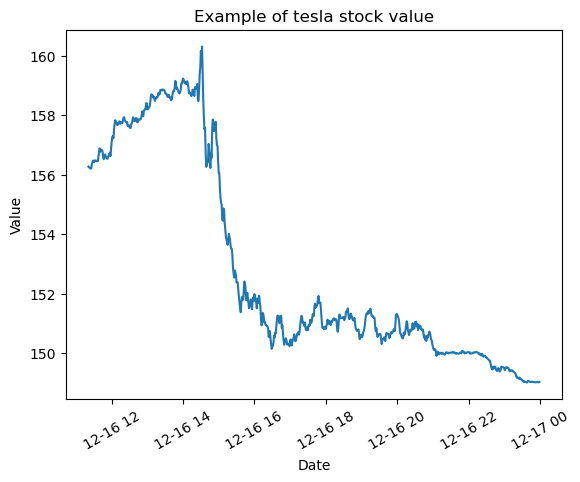

In [62]:
import matplotlib.pyplot as plt
plt.plot(grouped)
plt.title("Example of tesla stock value")
plt.xticks(rotation=30)
plt.xlabel("Date")
plt.ylabel("Value")